# __How to detect outliers using IQR and Boxplots?__

_Let's understand what are outliers, how to identify them using iQR and Boxplots and how to treat them if appropriate_

## 1. **What are outliers?**

In statistics, outliers are those specific data points which differ significantly from other data points in the dataset. 

There can be various reasons behind the outliers. It can be because of some event or some experimental/data entry error. Outliers are usually categorized as either __point__ or __pattern outliers__. 

Point outliers are the one which are single instances/datapoints of something abnormal, on the other hand pattern outliers are the clusters of instances/datapoints of something abnormal.

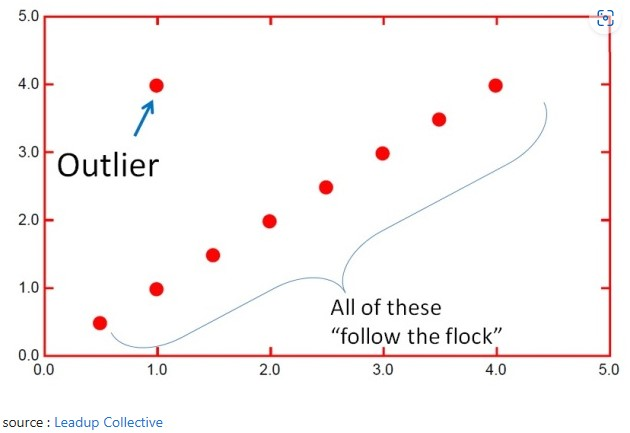

## 2. **Why should you treat the outliers?**

Outliers present in the data can cause various problems:

1. __Outliers might force the algorithm to fit the model away from the true relationship.__ Various algorithms work on minimizing the error/cost function, which can change because of outliers. The image below shows the impact.

2. They can affect the various statistics and significance tests you might do on the data. For example, it can impact the correlation you calculate between two numeric variables. So, __it is a good practice to treat / remove outliers before you calculate correlations.__ 

__Note:__ Outliers are not necessarily a bad thing to have in the data. Sometimes these are just observations that are not following the same pattern than the other ones. 

But it can also be the case that an outlier is very interesting for Science. 

For example, if in a vaccination experiment, a person is infected with COVID-19 whereas all other vaccinated people are immune to COVID-19, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers. 

So whenever you do identify outliers, don't simply remove or treat them. Maybe such extreme data points can occur again? then consider including those datapoints in your data and let ML learn from them.

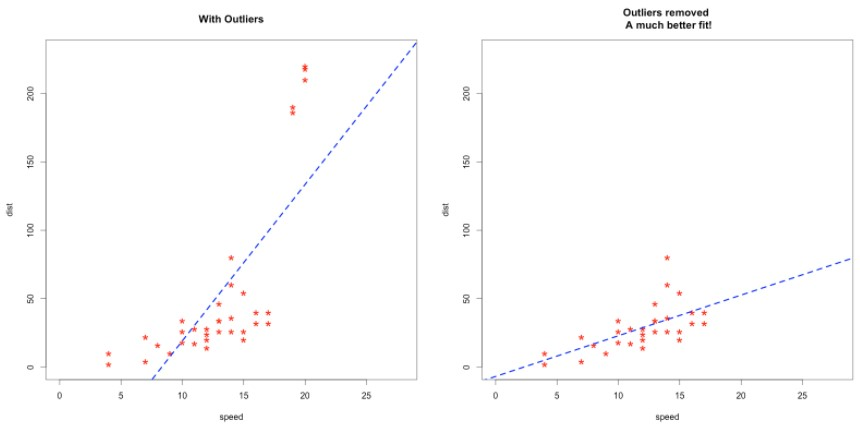

## 3. Detecting Outliers using Box and Whisker Plot

Box Plot is the visual representation to see how a numerical data is spread. It can also be used to detect the outlier. 

It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare data distribution easily across groups.

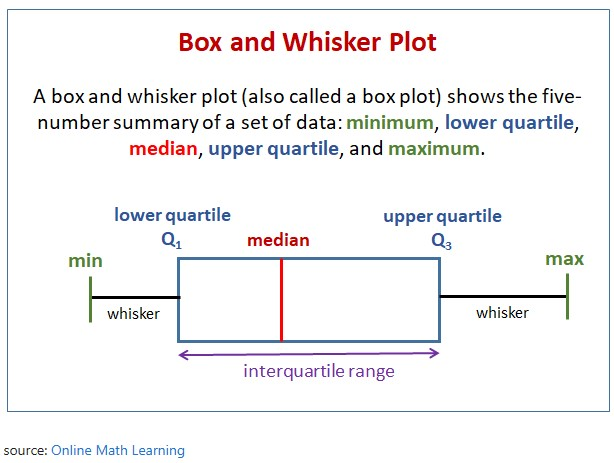

__So how to spot outliers in a box plot?__

Those points that lie outside the whiskers are generally considered as outliers. Where, the whiskers are placed at a distance of 1.5 times the Interquartile Range (IQR) from the edge of the respective box. IQR is nothing but the difference between 3rd quartile and the 1st quartile.

Usually the outlier datapoints are marked as dots in the box plot.

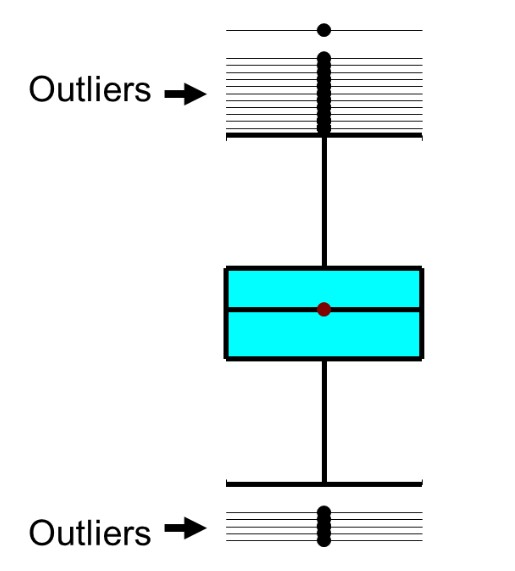

__Import Data__

The only packages we need for this are numpy and pandas for data wrangling, and matplotlib and seaborn for visualization.

In [1]:
# Import libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
import numpy as np 
import pandas as pd

# Set pandas options to show more rows and columns
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

__Load dataset__

Let's define the numeric and categorical columns.

In [6]:
# Target class name
input_target_class = "Exited"

# Columns to be removed
input_drop_col = "CustomerId"

# Categorical columns
input_cat_columns = ['Surname', 'Geography', 'Gender', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Numerical columns
input_num_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

Now, import the dataset as pandas dataframe.

In [3]:
# Read data in form of a csv file
df = pd.read_csv("Churn_Modelling.csv")

# First 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Draw boxplot for all columns one by one

Iterate over each column and draw boxplot for each.

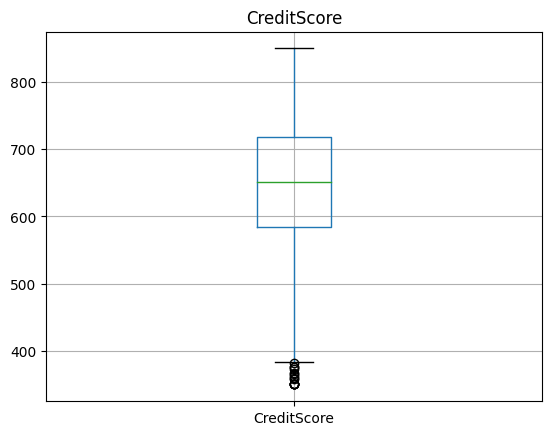

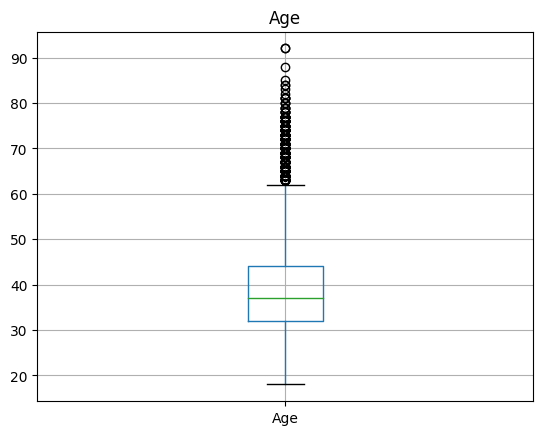

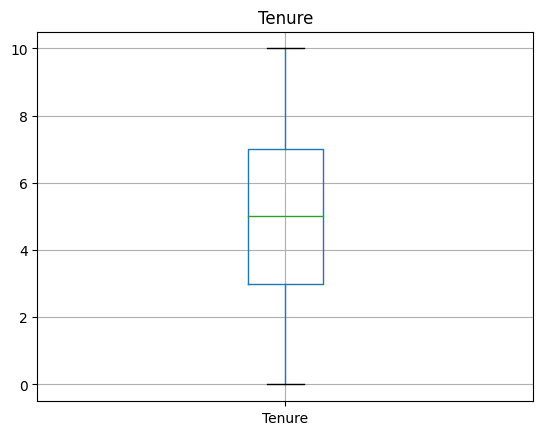

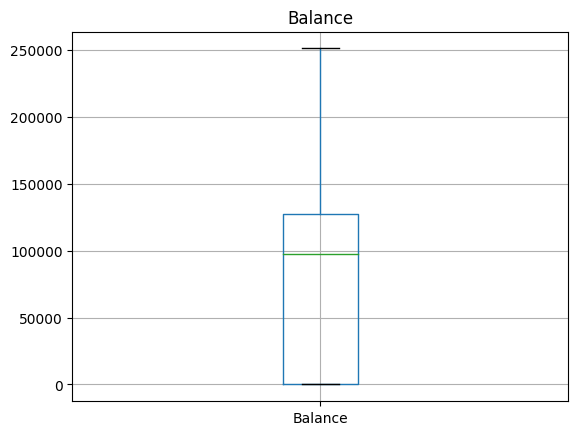

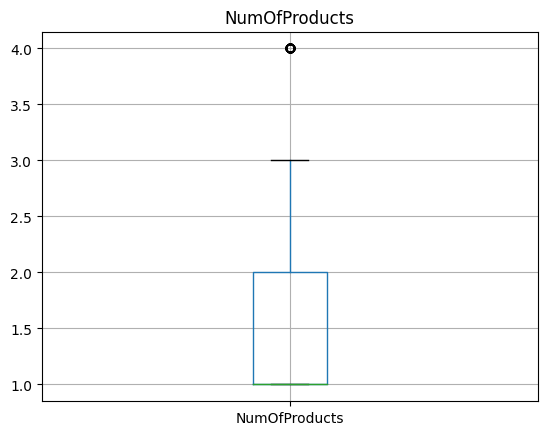

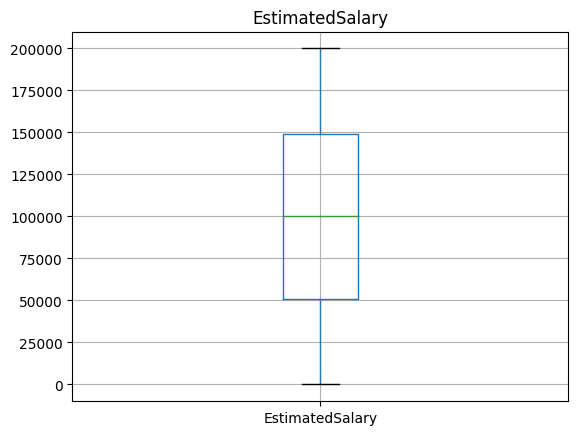

In [7]:
# Draw boxplot for each numeric column.
for column in df:
    if column in input_num_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

__Inference__

Outliers are visible for 'Number of Products', 'Age' and 'Credit Score'.

#### Draw boxplot for all columns at once using seaborn

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 4. Compare Boxplots side by side, against each class of the target variable.

We can do this with `seaborn` using `sns.boxplot`. 

__Credit Score__

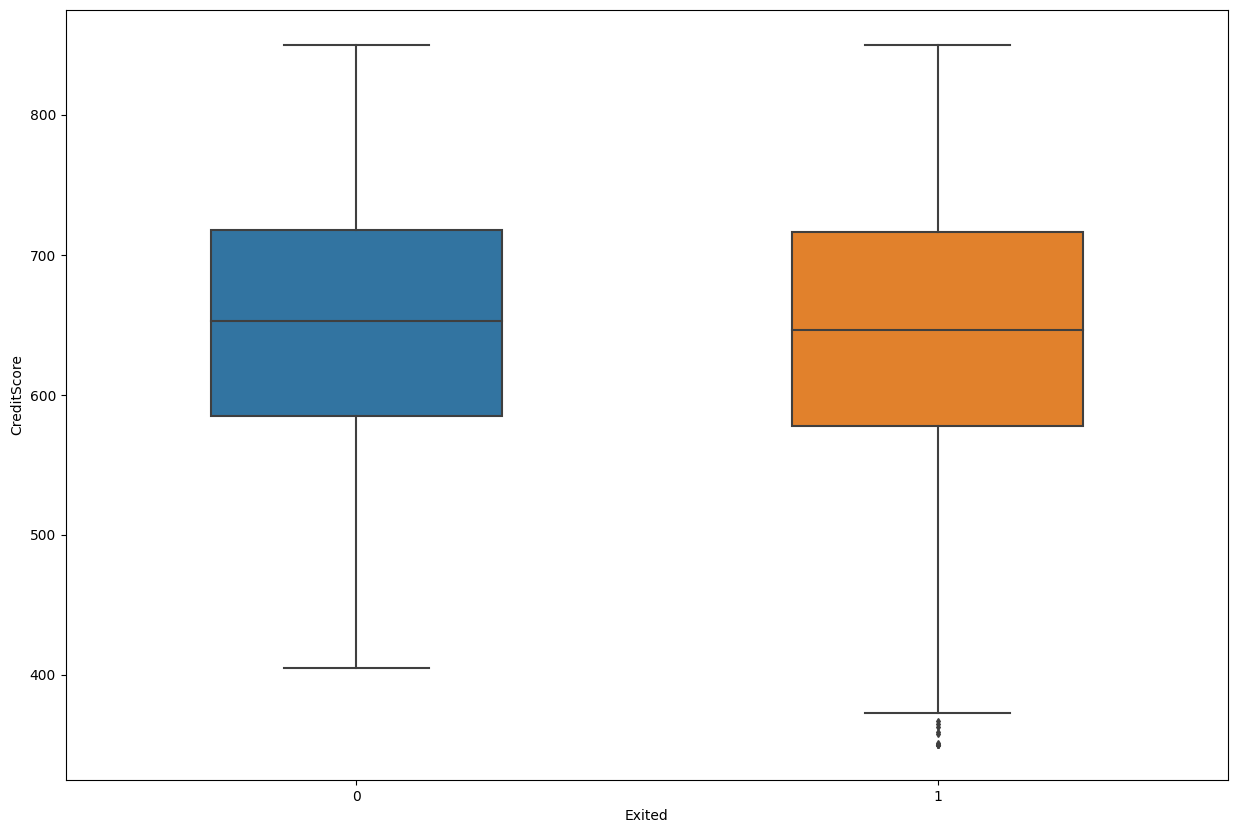

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5, ax=ax,  fliersize=3, y="CreditScore", x="Exited");

__Number of products__

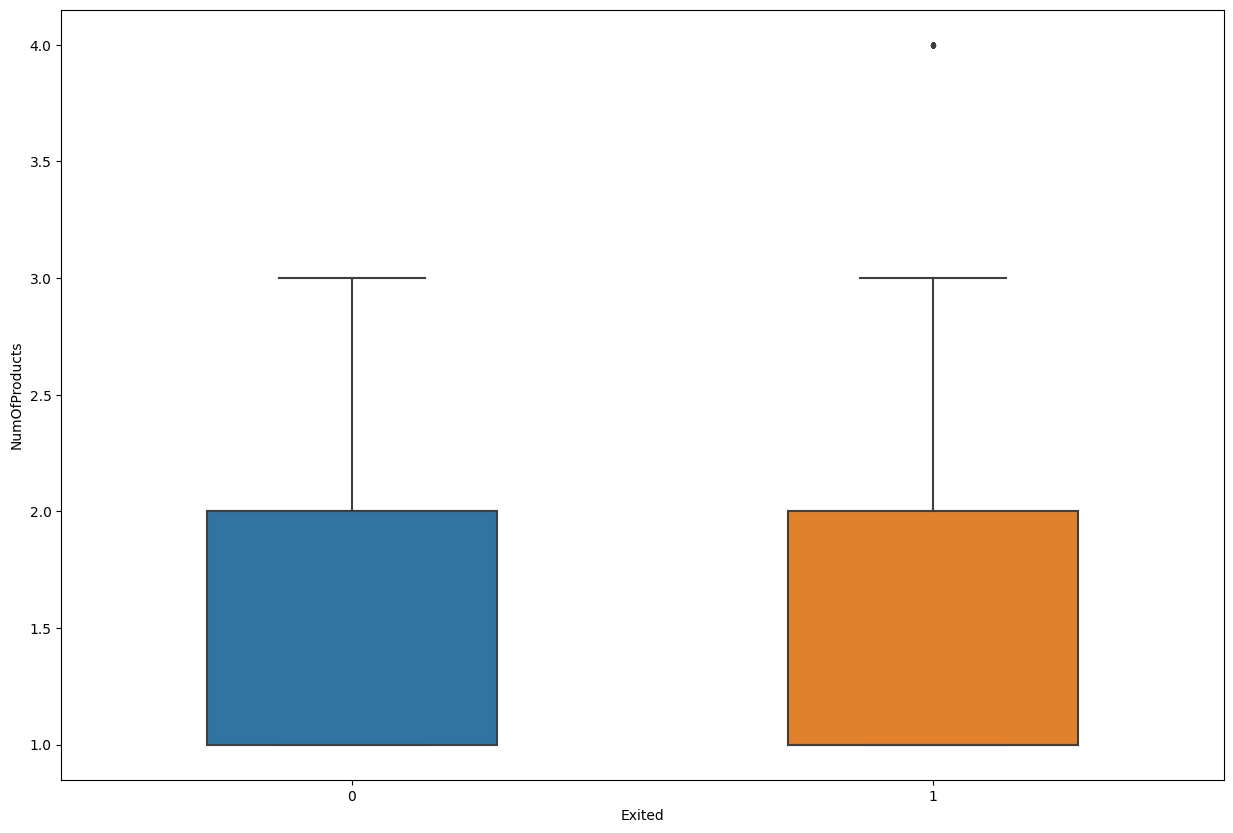

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5, ax=ax,  fliersize=3, y="NumOfProducts", x="Exited");

__Age__

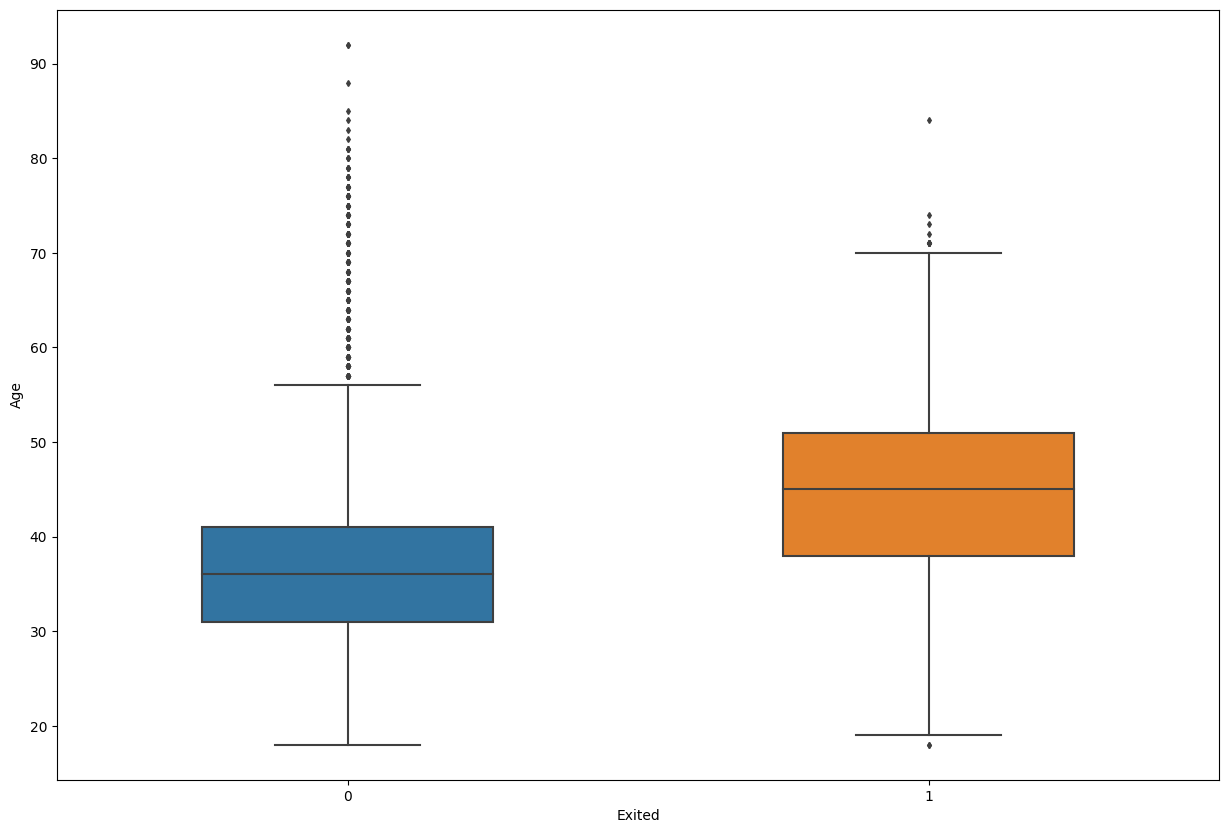

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5, ax=ax,  fliersize=3, y="Age", x="Exited");

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences: </h4>
</div>

- By observing the above boxplot you can manually detect the outlier values.
- Example: In the above boxplots Credit score contains more outlier values compared to others.

Let's find these points mathematically, not visually. Let's look at Interquartile Range (IQR)

## 5. __Outlier Detection using Interquartile Range (IQR)__

The interquartile range (IQR) is a measure of stastical dispersion which is equal to the difference between 1st and 3rd quartile. It's basically first quartile subtracted from the third quartile.  

IQR = Q₃ − Q₁

How to detect outliers now IQR?

All the values above __Q3 + 1.5*IQR__ and the values below __Q1 - 1.5*IQR__ are outliers. That's basically all the points outside the whiskers.

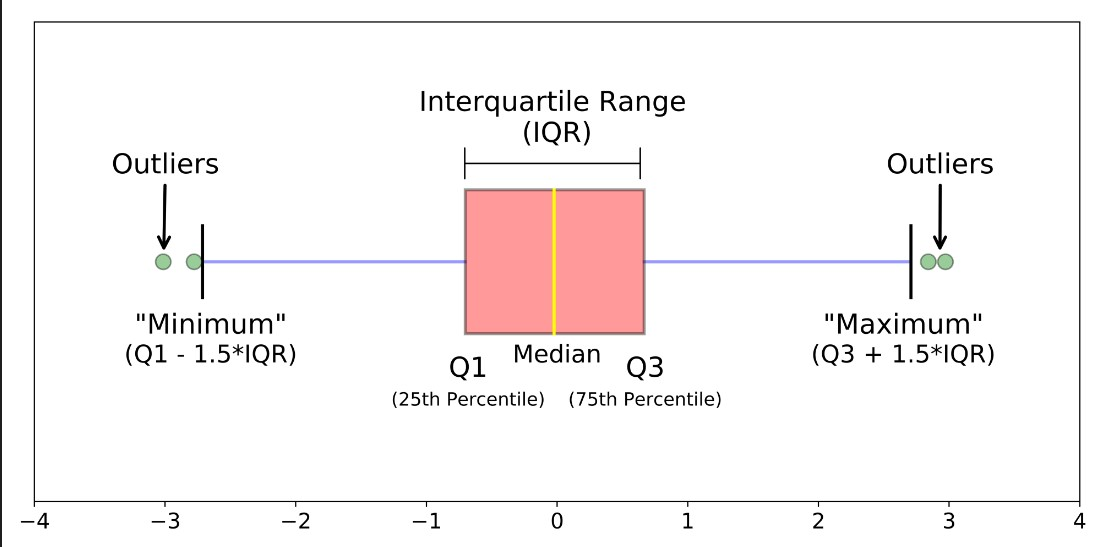



__Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:__

1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

Let's find the outliers in the LSTAT feaure in boston df

In [12]:
# Sort the data
# data = boston_df.LSTAT 
data = df.CreditScore
sort_data = np.sort(data) 
sort_data

array([350, 350, 350, ..., 850, 850, 850], dtype=int64)

Find the 1st and 3rd quartiles.

In [14]:
# Find the 1st and 3rd quartiles
# We use the nanpercentile function to ignore the missing value just in case.
q1 = np.nanpercentile(data, 25, method='midpoint', ) 
q2 = np.nanpercentile(data, 50, method='midpoint') 
q3 = np.nanpercentile(data, 75, method='midpoint') 

IQR = q3 - q1 
print('Interquartile range is', IQR) 

Interquartile range is 134.0


__Plot the boxplot__

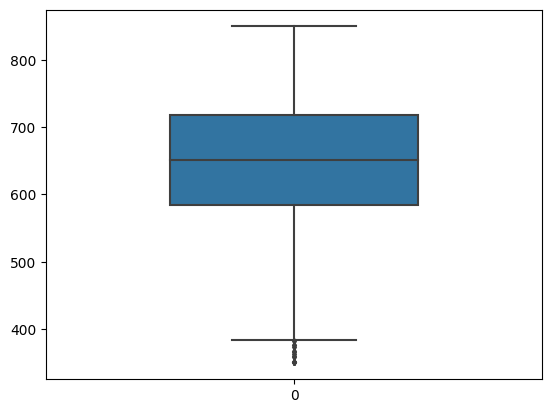

In [15]:
sns.boxplot(data=sort_data, width= 0.5, fliersize=3);

Calculate the upper and lower limit for outliers.

In [16]:
lower_limit = q1 - 1.5*(q3 - q1)
upper_limit = q3 + 1.5*(q3 - q1)
print(lower_limit)
print(upper_limit)

lower_limitoutliers = sort_data[sort_data < lower_limit]
upper_limitoutliers = sort_data[sort_data > upper_limit]

383.0
919.0


Let's see the upper and lower limit outliers.

In [17]:
upper_limitoutliers

array([], dtype=int64)

In [18]:
lower_limitoutliers

array([350, 350, 350, 350, 350, 351, 358, 359, 363, 365, 367, 373, 376,
       376, 382], dtype=int64)

__Inference:__

So, Outliers are found only at the lower tail.

__Treating Outliers__

Optionally, you can replace the values outside the limits with respective threshold. But in this context, it's not needed. So, I am commenting out the following code.



In [19]:
# sort_data[sort_data < lower_limit] = lower_limit
# sort_data[sort_data > upper_limit] = upper_limit